<a href="https://colab.research.google.com/github/Utpal-Mishra/Bidnamics/blob/main/Bidnamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Drive

1. Import drive library into Google Collaboratory
2. Mount Google Drive to Access Drive Files

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

1. Import pandas to import .csv file and use the DataFrame
2. Import plotly to make visual interpretations and gains deeper insights

In [55]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from tqdm import tqdm

### Import Data

1. Fetch Stored Path of Data in the Google Drive
2. Use read_csv() to read .csv File and Convert Store it into DataFrame - pandas Data Structure
3. Using head(n) to Dispaly First n rows of the DataFrame. By default, n = 5

In [186]:
path = "/content/drive/MyDrive/Jobs/Binamics/hack_day_data_train.csv"
data = pd.read_csv(path)
print('Data Shape: {}'.format(data.shape))

data.head() #data.tail(n)

Data Shape: (6415, 11)


,offerId,title,description,itemGroupId,price,productTypes,sizes,color,brand,clicks,conversions
0,shopify_gb_7124848804012_40995451699372,Limited Edition Valentine's Phone Case - Leopa...,Calling all leopard loving ladies! We've got t...,7.124849e+12,"{'value': '25.00', 'currency': 'GBP'}",['Tough Phone Case'],['Samsung Galaxy S21 Plus'],NaN,NaN,0,0.0
1,shopify_gb_4421341118562_31614566236258,"Personalised Ipad Case - Starry Night, Ipad Mi...",This iPad Case has put stars in our eyes! Let ...,4.421341e+12,"{'value': '35.00', 'currency': 'GBP'}",['Personalised Ipad Case'],['Ipad Mini 4'],black,NaN,2,0.0
2,shopify_gb_4468302676066_31826267537506,"Tough Phone Case - Oranges, Samsung Galaxy S6 ...",Orange you glad we created a JUICY Phone Case ...,4.468303e+12,"{'value': '25.00', 'currency': 'GBP'}",['Tough Phone Case'],['Samsung Galaxy S6 Edge'],Nude,NaN,0,0.0
3,shopify_gb_3945047162978_29455211331682,"Personalised Phone Case - Grey & Black Marble,...",Who knew a phone case could look so…classy?! W...,3.945047e+12,"{'value': '19.00', 'currency': 'GBP'}",['Personalised Phone Case'],['iPhone X/XS'],NaN,Coconut Lane,5,0.0
4,shopify_gb_7006203674796_40653202915500,"Tough Phone Case - Brown Swirls, Samsung Galax...",Nothing screams Autumn more than brown swirls ...,7.006204e+12,"{'value': '25.00', 'currency': 'GBP'}",['Tough Phone Case'],['Samsung Galaxy S7'],NaN,NaN,3,0.0


## Data Cleaning

1. Cleaning the price attribute to fetch only the price amount and convert the numeric string to float (Price in GBP Currency)
2. Adding Advertising Metrics - Conversion Rate and Average Cost Per Click - columns into the DataFrame based on 'clicks' and 'conversion'
3. Fetching Product Type Details from a String of Dictionary and Replacing Null Values with 'Unknown' Product Type value
4. Creating a Brand Feature if, Company Name is present in the Form of SubString in the 'title' attribute else from the Product Type column values

### Fetching Price

In [187]:
for i in range(len(data)):
  data.price[i] = float(data.price[i].split("'")[3])

data.tail()

,offerId,title,description,itemGroupId,price,productTypes,sizes,color,brand,clicks,conversions
6410,shopify_gb_4357137989730_31987515883618,"Candy Hearts Phone Case, iPhone 12 Mini",Keep it cute wherever you go with our super sw...,4.357138e+12,14.0,['Phone Case'],['iPhone 12 Mini'],pink,Coconut Lane,66,2.0
6411,shopify_gb_4421311037538_37851058765996,"Personalised Ipad Case - House Plants, Ipad 10...",Personalisation and cute prints your thing? Yo...,4.421311e+12,35.0,['Personalised Ipad Case'],['Ipad 10.2 (2020/8th Gen)'],pink,NaN,35,2.0
6412,shopify_gb_6832981344428_40137802186924,"Stay Wild Set, UK 14 / UK 6",Meeow! Looking for your new summer staple outf...,6.832981e+12,65.0,['Sets'],['UK 6'],NaN,NaN,2,0.0
6413,shopify_gb_7104510558380_40916107231404,"Tough Phone Case - Nude Snake, Samsung Galaxy ...",Introducing our Nude Snake Tough Phone Case - ...,7.104511e+12,25.0,['Tough Phone Case'],['Samsung Galaxy S9 Plus'],NaN,NaN,0,0.0
6414,shopify_gb_7124847919276_40995446685868,Limited Edition Valentine's Phone Case - Love ...,For this case we've collaborated with the love...,7.124848e+12,19.0,['Tough Phone Case'],['iPhone 7/8'],NaN,NaN,0,0.0


### Advertising Metrics

In [188]:
conversationRate = []
averageCostPerClick = []

for i in range(len(data)):
  if data.clicks[i] == 0:
    conversationRate.append(data.clicks[i])
    averageCostPerClick.append(data.clicks[i])
  else:
    conversationRate.append(data.conversions[i]/data.clicks[i])
    averageCostPerClick.append(data.price[i]/float(data.clicks[i]))

data['conversationRate'] = conversationRate
data['averageCostPerClick'] = averageCostPerClick

In [189]:
data

,offerId,title,description,itemGroupId,price,productTypes,sizes,color,brand,clicks,conversions,conversationRate,averageCostPerClick
0,shopify_gb_7124848804012_40995451699372,Limited Edition Valentine's Phone Case - Leopa...,Calling all leopard loving ladies! We've got t...,7.124849e+12,25.0,['Tough Phone Case'],['Samsung Galaxy S21 Plus'],NaN,NaN,0,0.0,0.000000,0.000000
1,shopify_gb_4421341118562_31614566236258,"Personalised Ipad Case - Starry Night, Ipad Mi...",This iPad Case has put stars in our eyes! Let ...,4.421341e+12,35.0,['Personalised Ipad Case'],['Ipad Mini 4'],black,NaN,2,0.0,0.000000,17.500000
2,shopify_gb_4468302676066_31826267537506,"Tough Phone Case - Oranges, Samsung Galaxy S6 ...",Orange you glad we created a JUICY Phone Case ...,4.468303e+12,25.0,['Tough Phone Case'],['Samsung Galaxy S6 Edge'],Nude,NaN,0,0.0,0.000000,0.000000
3,shopify_gb_3945047162978_29455211331682,"Personalised Phone Case - Grey & Black Marble,...",Who knew a phone case could look so…classy?! W...,3.945047e+12,19.0,['Personalised Phone Case'],['iPhone X/XS'],NaN,Coconut Lane,5,0.0,0.000000,3.800000
4,shopify_gb_7006203674796_40653202915500,"Tough Phone Case - Brown Swirls, Samsung Galax...",Nothing screams Autumn more than brown swirls ...,7.006204e+12,25.0,['Tough Phone Case'],['Samsung Galaxy S7'],NaN,NaN,3,0.0,0.000000,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,shopify_gb_4357137989730_31987515883618,"Candy Hearts Phone Case, iPhone 12 Mini",Keep it cute wherever you go with our super sw...,4.357138e+12,14.0,['Phone Case'],['iPhone 12 Mini'],pink,Coconut Lane,66,2.0,0.030303,0.212121
6411,shopify_gb_4421311037538_37851058765996,"Personalised Ipad Case - House Plants, Ipad 10...",Personalisation and cute prints your thing? Yo...,4.421311e+12,35.0,['Personalised Ipad Case'],['Ipad 10.2 (2020/8th Gen)'],pink,NaN,35,2.0,0.057143,1.000000
6412,shopify_gb_6832981344428_40137802186924,"Stay Wild Set, UK 14 / UK 6",Meeow! Looking for your new summer staple outf...,6.832981e+12,65.0,['Sets'],['UK 6'],NaN,NaN,2,0.0,0.000000,32.500000
6413,shopify_gb_7104510558380_40916107231404,"Tough Phone Case - Nude Snake, Samsung Galaxy ...",Introducing our Nude Snake Tough Phone Case - ...,7.104511e+12,25.0,['Tough Phone Case'],['Samsung Galaxy S9 Plus'],NaN,NaN,0,0.0,0.000000,0.000000


### Dealing with NULL Values

In [190]:
for i in range(len(data)):
  try:
    data.productTypes[i] = data.productTypes[i].split("'")[1]
  except: 
    data.productTypes[i] = 'Unknown'

for i in range(len(data)):
  try:
    data.sizes[i] = data.sizes[i].split("'")[1]
  except: 
    data.sizes[i] = 'Unknown'

data.color = data.color.fillna("Unknown")
data.brand = data.brand.fillna("Unknown")

### Branding

In [191]:
brand = []

for i in range(len(data.title)):
  if 'samsung' in data.title[i].lower():
    brand.append('Samsung')
  elif 'iphone' in data.title[i].lower() or 'ipad' in data.title[i].lower() or 'notebook' in data.title[i].lower() or 'airtag' in data.title[i].lower() or 'airpod' in data.title[i].lower():
    brand.append('Apple')
  elif 'fitbit' in data.title[i].lower():
    brand.append('Fitbit')
  elif 'huawei' in data.title[i].lower():
    brand.append('Huawei')
  elif 'bag' in data.title[i].lower():
    brand.append('Unknwon Bag Brand')
  elif 'ring' in data.title[i].lower():
    brand.append('Unknwon Ring Brand')
  elif 'face covering' in data.title[i].lower():
    brand.append('Unknwon Face Covering Brand')
  elif 'tag' in data.title[i].lower():
    brand.append('Unknwon Face Covering Brand')
  elif 'phone case' in data.title[i].lower():
    brand.append('Unknwon Phone Case Brand')
  else: brand.append(data.productTypes[i])

data['brandName'] = brand
data.head()

,offerId,title,description,itemGroupId,price,productTypes,sizes,color,brand,clicks,conversions,conversationRate,averageCostPerClick,brandName
0,shopify_gb_7124848804012_40995451699372,Limited Edition Valentine's Phone Case - Leopa...,Calling all leopard loving ladies! We've got t...,7.124849e+12,25.0,Tough Phone Case,Samsung Galaxy S21 Plus,Unknown,Unknown,0,0.0,0.0,0.000000,Samsung
1,shopify_gb_4421341118562_31614566236258,"Personalised Ipad Case - Starry Night, Ipad Mi...",This iPad Case has put stars in our eyes! Let ...,4.421341e+12,35.0,Personalised Ipad Case,Ipad Mini 4,black,Unknown,2,0.0,0.0,17.500000,Apple
2,shopify_gb_4468302676066_31826267537506,"Tough Phone Case - Oranges, Samsung Galaxy S6 ...",Orange you glad we created a JUICY Phone Case ...,4.468303e+12,25.0,Tough Phone Case,Samsung Galaxy S6 Edge,Nude,Unknown,0,0.0,0.0,0.000000,Samsung
3,shopify_gb_3945047162978_29455211331682,"Personalised Phone Case - Grey & Black Marble,...",Who knew a phone case could look so…classy?! W...,3.945047e+12,19.0,Personalised Phone Case,iPhone X/XS,Unknown,Coconut Lane,5,0.0,0.0,3.800000,Apple
4,shopify_gb_7006203674796_40653202915500,"Tough Phone Case - Brown Swirls, Samsung Galax...",Nothing screams Autumn more than brown swirls ...,7.006204e+12,25.0,Tough Phone Case,Samsung Galaxy S7,Unknown,Unknown,3,0.0,0.0,8.333333,Samsung


## Interpretations

1. Making visual interpretations to analyze frequency of different products bought
2. Comparing total clicks for the products bought
3. Analyzing the conversion rate of the products i.e. the products bought after a click
4. Encapsulating two plots to understand the difference between conversion rate and the average cost per click for products
5. Understand the % sale of different brands products

### Frequency of Different Products Bought

In [192]:
productCount = pd.DataFrame(data.productTypes.value_counts()).reset_index().sort_values('index')
productCount.columns = ['productName', 'freq']
fig = go.Figure(data=[go.Pie(labels=productCount["productName"], values=productCount.freq, hole=.5)])
fig.update_layout(height=1000, width=1400, title_text='Frequency of Different Products Bought') 
fig.show()

### Total Clicks

In [194]:
totalClicks = pd.DataFrame(data.groupby(['productTypes'])['clicks'].sum()).reset_index()
totalClicks.head()

,productTypes,clicks
0,AirTag Cases,2699
1,Airpod Cases,15457
2,Apple Watch Straps,168156
3,Beauty Balms,20
4,Bracelet,6


In [195]:
fig = px.bar(totalClicks, y=totalClicks.productTypes, x=totalClicks.clicks, color=totalClicks.clicks)
fig.update_xaxes(title_text = "Product Types", rangeslider_visible=False, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = 'Clicks', showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(height=1000, width=1400, title_text='Total Clicks for Product Types') 
fig.show()

### Conversion Rate Comparision

In [202]:
conversionRate = pd.DataFrame(data.groupby(['productTypes'])['conversationRate'].mean()).reset_index()
conversionRate.head()

,productTypes,conversationRate
0,AirTag Cases,0.069860
1,Airpod Cases,0.057528
2,Apple Watch Straps,0.039531
3,Beauty Balms,0.000000
4,Bracelet,0.000000


In [199]:
fig = px.bar(conversionRate, y=conversionRate.productTypes, x=conversionRate.conversationRate, color=conversionRate.conversationRate)
fig.update_xaxes(title_text = "Conversion Rate", rangeslider_visible=False, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = 'Product Types', showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(height=1000, width=1400, title_text='Conversion Rate for Product Types') 
fig.show()

### Conversion Rate Comparision

In [66]:
averageCostPerClick = pd.DataFrame(data.groupby(['productTypes'])['averageCostPerClick'].sum()).reset_index()
averageCostPerClick.head()

,productTypes,averageCostPerClick
0,AirTag Cases,3.913488
1,Airpod Cases,120.627182
2,Apple Watch Straps,364.379177
3,Beauty Balms,2.352941
4,Bracelet,5.333333


In [67]:
fig = px.bar(averageCostPerClick, y=averageCostPerClick.productTypes, x=averageCostPerClick.averageCostPerClick, color=averageCostPerClick.averageCostPerClick)
fig.update_xaxes(title_text = "Average Cost Per Click", rangeslider_visible=False, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = 'Product Type', showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(height=1000, width=1400, title_text='Average Cost Per Click for Product Types') 
fig.show()

### Conversion Rate vs Average Cost Per Click Comparision

In [203]:
compare = pd.DataFrame(data.groupby(['productTypes'])['clicks', 'conversationRate', 'averageCostPerClick'].sum()).reset_index().sort_values('conversationRate')
compare.head()

,productTypes,clicks,conversationRate,averageCostPerClick
39,Sets,7,0.0,184.166667
44,Travel Set,1,0.0,20.000000
9,Charm,29,0.0,15.312500
3,Beauty Balms,20,0.0,2.352941
4,Bracelet,6,0.0,5.333333


In [204]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=compare.productTypes, y=compare.conversationRate, mode='lines', name='Conversation Rate', line=dict(width = 2)))
fig.add_trace(go.Scatter(x=compare.productTypes, y=compare.averageCostPerClick, mode='lines+markers', name='Average Cost Per Click'))
#fig.add_trace(go.Scatter(x=compare.productTypes, y=compare.clicks, mode='markers', name='Conversation Rate', line=dict(width = 3)))
fig.update_xaxes(title_text = "Product Type", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(height=700, width=1400, title_text='Conversation Rate vs Average Cost Per Click For Product Types')
fig.show()

### Frequency of Different Brand Products Bought

In [205]:
brandCount = pd.DataFrame(data.brandName.value_counts()).reset_index().sort_values('index')
brandCount.columns = ['brandName', 'freq']
fig = go.Figure(data=[go.Pie(labels=brandCount["brandName"], values=brandCount.freq, hole=.5)])
fig.update_layout(height=800, width=1400, title_text='Frequency of Different Brand Products Bought') 
fig.show()

## Sentimental Analysis

1. Performing Sentimental Analysis based on the Product Description Details to make analyze the direct engagement with 'clicks'
2. Using NLTK Package:
 - Noun phrase extraction
 - Part-of-speech tagging
 - Sentiment analysis
 - Classification (Naive Bayes, Decision Tree)
 - Tokenization (splitting text into words and sentences)
 - Word and phrase frequencies
 - Parsing
 - n-grams
 - Word inflection (pluralization and singularization) and lemmatization
 - Spelling correction
3. Using TextBlob/ Vader Sentimental Library to Processing Textual Data and Find Overall Sentiment Polarity. 
 - Negative Polarity: -1
 - Neutral Polarity: 0
 - Positive Polarity: 1

### Import Libraries to Perform Sentimental Analysis

1. Import 'tqdm' to keep a % completetion while using loops/ iterations
2. Using 're' to match and fetch precise regular expressions
3. Importing NLTK package to compare the words in text with stopwords and filter them
4. Using 'vaderSenimentel' to convert phrases into vectors


In [71]:
from tqdm import tqdm
import re
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Prepare a DataFrame based on Product Types and Product Description Feature Variables

In [72]:
sentiment = pd.DataFrame(data[['productTypes', 'description']])
sentiment

,productTypes,description
0,Tough Phone Case,Calling all leopard loving ladies! We've got t...
1,Personalised Ipad Case,This iPad Case has put stars in our eyes! Let ...
2,Tough Phone Case,Orange you glad we created a JUICY Phone Case ...
3,Personalised Phone Case,Who knew a phone case could look so…classy?! W...
4,Tough Phone Case,Nothing screams Autumn more than brown swirls ...
...,...,...
6410,Phone Case,Keep it cute wherever you go with our super sw...
6411,Personalised Ipad Case,Personalisation and cute prints your thing? Yo...
6412,Sets,Meeow! Looking for your new summer staple outf...
6413,Tough Phone Case,Introducing our Nude Snake Tough Phone Case - ...


### Preparing Textual Corpus

In [73]:
corpus=[]
for i in tqdm(range(data.shape[0])):
  review = re.sub('[^a-zA-z]',' ', str(data['description'][i]))
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review) 

100%|██████████| 6415/6415 [02:42<00:00, 39.56it/s]


### Using Vader Sentimental Object and Store Negative, Neutral and Positive Polarity into DataFrame

In [74]:
analyser = SentimentIntensityAnalyzer()

compound = []
neg = []
neu = []
pos = []

for i in tqdm(range(len(corpus))):
  compound.append(analyser.polarity_scores(corpus[i])['compound'])
  neg.append(analyser.polarity_scores(corpus[i])['neg'])
  neu.append(analyser.polarity_scores(corpus[i])['neu'])
  pos.append(analyser.polarity_scores(corpus[i])['pos'])

sentiment['compound'] = compound
sentiment['neg'] = neg
sentiment['neu'] = neu
sentiment['pos'] = pos

100%|██████████| 6415/6415 [00:45<00:00, 140.18it/s]


### Preparing a DataFrame using Groupby Function on Product Type Feature and Taking Mean of the Sentiments

In [75]:
sentiment = sentiment.groupby(['productTypes']).mean().reset_index()
sentiment

,productTypes,compound,neg,neu,pos
0,AirTag Cases,0.925473,0.090636,0.642909,0.266636
1,Airpod Cases,0.813443,0.062968,0.682079,0.254841
2,Apple Watch Straps,0.915236,0.033992,0.771902,0.194074
3,Beauty Balms,0.963050,0.000000,0.707000,0.293000
4,Bracelet,0.891000,0.000000,0.808000,0.192000
5,Bundle,0.413665,0.046500,0.866607,0.086840
6,Cami Tops,0.805767,0.000000,0.800000,0.200000
7,Candles,0.709804,0.035577,0.725154,0.239308
8,Card Holders,0.651171,0.060286,0.739571,0.200000
9,Charm,0.943709,0.027156,0.705313,0.267500


In [76]:
sentiment['compound %'] = sentiment.compound*100/sentiment.compound.mean()
sentiment['neg %'] = sentiment.neg*100/sentiment.neg.mean()
sentiment['neu %'] = sentiment.neu*100/sentiment.neu.mean()
sentiment['pos %'] = sentiment.pos*100/sentiment.pos.mean()

sentiment

,productTypes,compound,neg,neu,pos,compound %,neg %,neu %,pos %
0,AirTag Cases,0.925473,0.090636,0.642909,0.266636,109.567017,228.343100,89.300888,110.934170
1,Airpod Cases,0.813443,0.062968,0.682079,0.254841,96.303764,158.637943,94.741689,106.026816
2,Apple Watch Straps,0.915236,0.033992,0.771902,0.194074,108.355095,85.636641,107.218117,80.744473
3,Beauty Balms,0.963050,0.000000,0.707000,0.293000,114.015802,0.000000,98.203197,121.902772
4,Bracelet,0.891000,0.000000,0.808000,0.192000,105.485779,0.000000,112.232225,79.881680
5,Bundle,0.413665,0.046500,0.866607,0.086840,48.973899,117.148943,120.372805,36.129640
6,Cami Tops,0.805767,0.000000,0.800000,0.200000,95.394977,0.000000,111.121015,83.210083
7,Candles,0.709804,0.035577,0.725154,0.239308,84.033908,89.630084,100.724789,99.564065
8,Card Holders,0.651171,0.060286,0.739571,0.200000,77.092397,151.879735,102.727409,83.210083
9,Charm,0.943709,0.027156,0.705313,0.267500,111.726059,68.415612,97.968801,111.293486


In [77]:
fig = go.Figure(data=[go.Pie(labels=sentiment.productTypes, values=sentiment['pos %'], hole=.5)])
fig.update_layout(height=700, width=1400, title_text='% Comparision for Neutral Sentiments of the Products Bought') 
fig.show()

In [78]:
#fig = go.Figure(data=[go.Pie(labels=sentiment.productTypes, values=sentiment['pos %'], hole=.5)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=sentiment.productTypes, y=sentiment['neg %'], mode='lines', name='Negative Polarity', line=dict(color = 'red', width = 2)))
fig.add_trace(go.Scatter(x=sentiment.productTypes, y=sentiment['neu %'], mode='lines+markers', name='Neutral Polarity', line=dict(color = 'blue', width = 2)))
fig.add_trace(go.Scatter(x=sentiment.productTypes, y=sentiment['pos %'], mode='lines', name='Positive Polarity', line=dict(color = 'green', width = 2)))
fig.update_xaxes(title_text = "Product Type", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=800, width=1400, title_text='% Comparision of Sentiments of the Products Bought')
fig.show()

## Modelling

In [79]:
newdata = data.drop(['offerId', 'brand', 'size', 'averageCostPerClick', 'averageCostPerClick', 'color'], axis = 1)
newdata.head()

,title,description,itemGroupId,price,productTypes,sizes,color,clicks,conversions,conversationRate,averageCostPerClick,brandName
0,Limited Edition Valentine's Phone Case - Leopa...,Calling all leopard loving ladies! We've got t...,7.124849e+12,25.0,Tough Phone Case,Samsung Galaxy S21 Plus,Unknown,0,0.0,0.0,0.000000,Samsung
1,"Personalised Ipad Case - Starry Night, Ipad Mi...",This iPad Case has put stars in our eyes! Let ...,4.421341e+12,35.0,Personalised Ipad Case,Ipad Mini 4,black,2,0.0,0.0,17.500000,Apple
2,"Tough Phone Case - Oranges, Samsung Galaxy S6 ...",Orange you glad we created a JUICY Phone Case ...,4.468303e+12,25.0,Tough Phone Case,Samsung Galaxy S6 Edge,Nude,0,0.0,0.0,0.000000,Samsung
3,"Personalised Phone Case - Grey & Black Marble,...",Who knew a phone case could look so…classy?! W...,3.945047e+12,19.0,Personalised Phone Case,iPhone X/XS,Unknown,5,0.0,0.0,3.800000,Apple
4,"Tough Phone Case - Brown Swirls, Samsung Galax...",Nothing screams Autumn more than brown swirls ...,7.006204e+12,25.0,Tough Phone Case,Samsung Galaxy S7,Unknown,3,0.0,0.0,8.333333,Samsung


In [87]:
corpus=[]
for i in tqdm(range(newdata.shape[0])):
  review = re.sub('[^a-zA-z]',' ', str(newdata['description'][i]))
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review) 

neg = []
neu = []
pos = []

for i in tqdm(range(len(corpus))):
  neg.append(analyser.polarity_scores(corpus[i])['neg'])
  neu.append(analyser.polarity_scores(corpus[i])['neu'])
  pos.append(analyser.polarity_scores(corpus[i])['pos'])

sentiment = []

for i in range(len(newdata)):
  if neg[i] >= neu[i] and neg[i] > pos[i]:
    sentiment.append(-1)
  elif neu[i] >= neg[i] and neu[i] > pos[i]:
    sentiment.append(0)
  elif pos[i] >= neg[i] > pos[i] > neu[i]:
    sentiment.append(1)
  else:
    sentiment.append(0)

newdata['description'] = sentiment

100%|██████████| 6415/6415 [00:34<00:00, 187.06it/s]


In [97]:
corpus=[]
for i in tqdm(range(newdata.shape[0])):
  review = re.sub('[^a-zA-z]',' ', str(newdata['title'][i]))
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review) 

neg = []
neu = []
pos = []

for i in tqdm(range(len(corpus))):
  neg.append(analyser.polarity_scores(corpus[i])['neg'])
  neu.append(analyser.polarity_scores(corpus[i])['neu'])
  pos.append(analyser.polarity_scores(corpus[i])['pos'])

sentiment = []

for i in range(len(newdata)):
  if neg[i] > neu[i] and neg[i] > pos[i]:
    sentiment.append(-1)
  elif neu[i] >= neg[i] and neu[i] > pos[i]:
    sentiment.append(0)
  elif pos[i] >= neg[i] > pos[i] > neu[i]:
    sentiment.append(1)
  else:
    sentiment.append(0)

newdata['title'] = sentiment

100%|██████████| 6415/6415 [00:00<00:00, 8090.67it/s]


In [112]:
newdata['productTypes'] = pd.factorize(newdata['productTypes'])[0]
newdata['brandName'] = pd.factorize(newdata['brandName'])[0]
newdata['itemGroupId'] = pd.factorize(newdata['itemGroupId'])[0]
newdata.head()

,title,description,itemGroupId,price,productTypes,clicks,conversions,conversationRate,brandName,titleSentiment
0,0,0,7.124849e+12,25.0,0,0,0.0,0.0,0,0
1,0,0,4.421341e+12,35.0,1,2,0.0,0.0,1,0
2,0,0,4.468303e+12,25.0,0,0,0.0,0.0,0,0
3,0,0,3.945047e+12,19.0,2,5,0.0,0.0,1,0
4,0,0,7.006204e+12,25.0,0,3,0.0,0.0,0,0


In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import time
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [130]:
newdata = newdata.fillna(0)
newdata = newdata.astype(int)

obs = int(0.75*data.shape[0])
train = newdata[:obs]
test  = newdata[obs:]

Y = train['conversationRate'].values
X = train.drop('conversationRate', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (3848, 9) X_test.shape:  (963, 9) Y_train.shape:  (3848,) Y_test.shape:  (963,)


In [131]:
"""import statsmodels.api as sm

X_Opt = np.append(arr = np.ones((X_train.shape[0], 1)), values = X_train, axis = 1)

regressor_OLS = sm.OLS(Y_train, X_Opt).fit()
print(regressor_OLS.summary())"""

'import statsmodels.api as sm\n\nX_Opt = np.append(arr = np.ones((X_train.shape[0], 1)), values = X_train, axis = 1)\n\nregressor_OLS = sm.OLS(Y_train, X_Opt).fit()\nprint(regressor_OLS.summary())'

In [155]:
XTest = test.drop(['conversationRate'], axis = 1)
XTest.shape

(1604, 9)

In [138]:
models_list = []
models_list.append(('SVM', SVC(C=1.7, kernel='rbf'))) 
models_list.append(('DT', DecisionTreeClassifier(criterion='entropy')))
models_list.append(('RF', RandomForestClassifier(criterion='entropy')))
models_list.append(('XGB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)))
models_list.append(('ADB', AdaBoostClassifier()))

ACCURACY = {}
EVALUATION = {}

SVM: 0.998181 (0.001663) (run time: 0.083086)
DT: 1.000000 (0.000000) (run time: 0.025205)
RF: 0.999221 (0.001190) (run time: 2.099726)
XGB: 0.999481 (0.001558) (run time: 1.370574)
ADB: 1.000000 (0.000000) (run time: 1.613543)


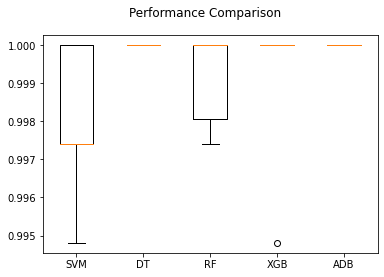

In [139]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [140]:
# Standardize the dataset
pipelines = []

pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=1.7, kernel='rbf'))])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier(criterion='entropy'))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(criterion='entropy'))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75))])))
pipelines.append(('ScaledADB', Pipeline([('Scaler', StandardScaler()),('ADB', AdaBoostClassifier())])))


results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledSVC: 0.998181 (0.001663) (run time: 0.151321)
ScaledDT: 1.000000 (0.000000) (run time: 0.050096)
ScaledRF: 0.999481 (0.001039) (run time: 2.134413)
ScaledXGB: 0.999481 (0.001558) (run time: 1.390636)
ScaledADB: 1.000000 (0.000000) (run time: 1.625277)


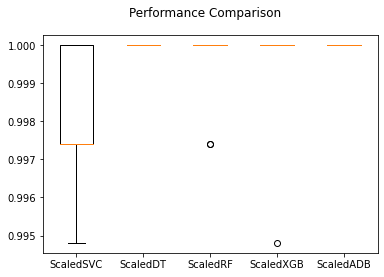

In [141]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###SVM

In [142]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998181 using {'C': 0.1, 'kernel': 'linear'}
0.998181 (0.001663) with: {'C': 0.1, 'kernel': 'linear'}
0.998181 (0.001663) with: {'C': 0.1, 'kernel': 'poly'}
0.998181 (0.001663) with: {'C': 0.1, 'kernel': 'rbf'}
0.998181 (0.001663) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.998181 (0.001663) with: {'C': 0.3, 'kernel': 'linear'}
0.998181 (0.001663) with: {'C': 0.3, 'kernel': 'poly'}
0.998181 (0.001663) with: {'C': 0.3, 'kernel': 'rbf'}
0.998181 (0.001663) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.998181 (0.001663) with: {'C': 0.5, 'kernel': 'linear'}
0.998181 (0.001663) with: {'C': 0.5, 'kernel': 'poly'}
0.998181 (0.001663) with: {'C': 0.5, 'kernel': 'rbf'}
0.998181 (0.001663) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.998181 (0.001663) with: {'C': 0.7, 'kernel': 'linear'}
0.998181 (0.001663) with: {'C': 0.7, 'kernel': 'poly'}
0.998181 (0.001663) with: {'C': 0.7, 'kernel': 'rbf'}
0.998181 (0.001663) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.998181 (0.001663) with: {'C': 0.9, 'kernel': 'line

In [147]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=grid_result.best_params_['C'], kernel=grid_result.best_params_['kernel'])
start = time.time()
SVM.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.007219


In [148]:
# estimate accuracy on validation dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
SVMPred = SVM.predict(X_test_scaled)

print(confusion_matrix(Y_test, SVMPred))

[[957   0]
 [  6   0]]


In [149]:
accuracy = accuracy_score(Y_test, SVMPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SVMPred))

Accuracy: 99.38%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       957
           1       0.00      0.00      0.00         6

    accuracy                           0.99       963
   macro avg       0.50      0.50      0.50       963
weighted avg       0.99      0.99      0.99       963



In [156]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
SVMPred = SVM.predict(XTest_scaled)

ACCURACY['SVM'] = accuracy
EVALUATION['SVM'] = list(SVMPred)

###DECISION TREE

In [157]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
DTPred = DT.predict(X_test)
DT.score(X_test, Y_test)
DT.fit(X_test, Y_test)

DecisionTreeClassifier(criterion='entropy')

In [158]:
cm = confusion_matrix(Y_test, DTPred)
print(cm)

[[957   0]
 [  0   6]]


In [159]:
accuracy = accuracy_score(Y_test, DTPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, DTPred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       957
           1       1.00      1.00      1.00         6

    accuracy                           1.00       963
   macro avg       1.00      1.00      1.00       963
weighted avg       1.00      1.00      1.00       963



In [160]:
DTPred = DT.predict(XTest)

ACCURACY['DT'] = accuracy
EVALUATION['DT'] = list(DTPred)

###DECISON TREE BAGGING

In [161]:
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)
Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
Bagging.score(X_test, Y_test)

0.9937694704049844

In [162]:
cm = confusion_matrix(Y_test, BPred)
print(cm)

[[957   0]
 [  6   0]]


In [163]:
accuracy = accuracy_score(Y_test, BPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, BPred))

Accuracy: 99.38%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       957
           1       0.00      0.00      0.00         6

    accuracy                           0.99       963
   macro avg       0.50      0.50      0.50       963
weighted avg       0.99      0.99      0.99       963



In [164]:
BPred = Bagging.predict(XTest)

ACCURACY['Bagging'] = accuracy
EVALUATION['Bagging'] = list(BPred)

###RANDOM FOREST

In [165]:
RF = RandomForestClassifier(criterion='entropy')
RF.fit(X_train,Y_train)
RFPred = RF.predict(X_test)
RF.score(X_test, Y_test)
RF.fit(X_test, Y_test)

RandomForestClassifier(criterion='entropy')

In [166]:
cm = confusion_matrix(Y_test, RFPred)
print(cm)

[[957   0]
 [  3   3]]


In [167]:
accuracy = accuracy_score(Y_test, RFPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, RFPred))

Accuracy: 99.69%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       957
           1       1.00      0.50      0.67         6

    accuracy                           1.00       963
   macro avg       1.00      0.75      0.83       963
weighted avg       1.00      1.00      1.00       963



In [168]:
RFPred = RF.predict(XTest)

ACCURACY['RF'] = accuracy
EVALUATION['RF'] = list(RFPred)

###XGBOOST

In [169]:
XGB = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGB.fit(X_train, Y_train, verbose=False)
XGBPred = XGB.predict(X_test)
XGB.fit(X_test, Y_test, verbose=False)
#XGB.score(X_test, Y_test)

XGBClassifier(learning_rate=0.08, subsample=0.75)

In [170]:
cm = confusion_matrix(Y_test, XGBPred)
print(cm)

[[957   0]
 [  0   6]]


In [171]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, XGBPred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       957
           1       1.00      1.00      1.00         6

    accuracy                           1.00       963
   macro avg       1.00      1.00      1.00       963
weighted avg       1.00      1.00      1.00       963



In [172]:
#XGBPred = XGB.predict(XTest)
#EVALUATION['XGB'] = list(XGBPred)

###ADABOOST

In [173]:
ADAB = AdaBoostClassifier()
ADAB.fit(X_train, Y_train)
ADABPred = ADAB.predict(X_test)
ADAB.fit(X_test, Y_test)

AdaBoostClassifier()

In [174]:
cm = confusion_matrix(Y_test, ADABPred)
print(cm)

[[957   0]
 [  0   6]]


In [175]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ADABPred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       957
           1       1.00      1.00      1.00         6

    accuracy                           1.00       963
   macro avg       1.00      1.00      1.00       963
weighted avg       1.00      1.00      1.00       963



In [176]:
ADABPred = ADAB.predict(XTest)

ACCURACY['ADB'] = accuracy
EVALUATION['ADB'] = list(ADABPred)

#EVALUATION

In [184]:
pd.DataFrame(ACCURACY, index = [0])

,SVM,DT,Bagging,RF,ADB
0,0.993769,1.0,0.993769,0.996885,1.0
